In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
coordinates = zip(x, y)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# Make an API Call

In [7]:
# Import the requests library.
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [42]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

# Make a Request for Data to an API

In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

# Get Data from a Response

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":53.65,"feels_like":51.06,"temp_min":48.45,"temp_max":59.11,"pressure":1017,"humidity":50},"visibility":10000,"wind":{"speed":8.99,"deg":140,"gust":15.99},"clouds":{"all":99},"dt":1651338577,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1651311643,"sunset":1651362119},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.65,
  'feels_like': 51.06,
  'temp_min': 48.45,
  'temp_max': 59.11,
  'pressure': 1017,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 140, 'gust': 15.99},
 'clouds': {'all': 99},
 'dt': 1651338577,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1651311643,
  'sunset': 1651362119},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Handle Request Errors

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 20:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


# Parse a Response from an API

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.65,
  'feels_like': 51.06,
  'temp_min': 48.45,
  'temp_max': 59.11,
  'pressure': 1017,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 140, 'gust': 15.99},
 'clouds': {'all': 99},
 'dt': 1651338577,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1651311643,
  'sunset': 1651362119},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1651311643,
 'sunset': 1651362119}

In [19]:
boston_data = city_weather.json()
boston_data["sys"]["country"]

'US'

In [20]:
boston_data = city_weather.json()
boston_data["dt"]

1651338577

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 59.11 50 99 8.99


# Convert the Date Timestamp

In [22]:
boston_data = city_weather.json()
boston_data["dt"]

1651338577

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 30, 17, 9, 37)

In [24]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-30 17:09:37'

# Get the City Weather Data

In [25]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [26]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(15.868800194525036, -123.72503921373865),
 (-53.443067379898174, 129.92087779357195),
 (-15.785745347809282, 5.434994929152822),
 (-43.959821816599145, 66.03083733701945),
 (2.1931073880875402, 61.634480732059984),
 (32.66274274712342, 33.03071542648087),
 (-62.36417082276148, 94.30810062293074),
 (-10.704607162783873, -37.74756412961966),
 (82.59536462122156, -130.26388800147825),
 (-63.18707784257695, 135.0001098068355),
 (-10.729591895861049, 129.32918780594827),
 (67.68174124761853, -0.9188175110607801),
 (-16.531684161200843, 23.537460117464576),
 (-13.042939378094701, 65.73629740872701),
 (74.16880793934516, -123.30153852973291),
 (21.518571323514237, -160.87016994737746),
 (-83.59179711646428, 52.464060795109816),
 (66.65739067778708, -68.12704525920074),
 (31.169369227359923, 169.63868877616534),
 (-41.445955614686554, -23.481460151744216),
 (-14.580979742743807, 14.337932938554246),
 (-30.63646403745956, -128.95672611365796),
 (81.74974684805099, 123.44837696238847),
 (29.21

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

# Get the City Weather Data

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | port said
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | simao dias
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | nguiu
City not found. Skipping...
Processing Record 12 of Set 1 | brae
Processing Record 13 of Set 1 | senanga
Processing Record 14 of Set 1 | grand gaube
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | caluquembe
Processing Record 22

Processing Record 38 of Set 4 | tulum
Processing Record 39 of Set 4 | epe
Processing Record 40 of Set 4 | kirakira
Processing Record 41 of Set 4 | nichlaul
Processing Record 42 of Set 4 | premia de mar
Processing Record 43 of Set 4 | bonavista
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | turka
Processing Record 48 of Set 4 | anshun
Processing Record 49 of Set 4 | hit
Processing Record 50 of Set 4 | lagoa
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | yantai
Processing Record 5 of Set 5 | alamosa
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | nikolayevsk-na-amure
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 | ust-kulom
Processing Record 10 of Set 5 | fortuna
Processing Record 11 of Set 5 | nouadhibou
Processing Record 12 of Set 5 |

Processing Record 29 of Set 8 | dakar
Processing Record 30 of Set 8 | watsa
Processing Record 31 of Set 8 | westport
Processing Record 32 of Set 8 | puerto del rosario
Processing Record 33 of Set 8 | kuche
City not found. Skipping...
Processing Record 34 of Set 8 | chipata
Processing Record 35 of Set 8 | nelson bay
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | clarksburg
Processing Record 38 of Set 8 | invermere
Processing Record 39 of Set 8 | lima
Processing Record 40 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 41 of Set 8 | izhmorskiy
Processing Record 42 of Set 8 | asyut
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | tynda
Processing Record 45 of Set 8 | mondragon
Processing Record 46 of Set 8 | sangar
Processing Record 47 of Set 8 | great falls
Processing Record 48 of Set 8 | gimli
Processing Record 49 of Set 8 | dvinskoy
Processing Record 50 of Set 8 | hamilton
Processing Record 1 of Set 9 | umea
Processing Reco

Processing Record 18 of Set 12 | kahama
Processing Record 19 of Set 12 | upata
Processing Record 20 of Set 12 | inyonga
Processing Record 21 of Set 12 | batetskiy
Processing Record 22 of Set 12 | mrirt
City not found. Skipping...
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | touros
Processing Record 25 of Set 12 | samana
Processing Record 26 of Set 12 | kidal
Processing Record 27 of Set 12 | faenza
Processing Record 28 of Set 12 | hannibal
Processing Record 29 of Set 12 | verkhnevilyuysk
Processing Record 30 of Set 12 | beyneu
Processing Record 31 of Set 12 | igarka
Processing Record 32 of Set 12 | chapais
Processing Record 33 of Set 12 | pimenta bueno
Processing Record 34 of Set 12 | northam
Processing Record 35 of Set 12 | banos
Processing Record 36 of Set 12 | khvorostyanka
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | haibowan
City not found. Skipping...
Processing Record 39 of Set 12 | ballina
Processing Record 40 of Set 12 

# Create a DataFrame of City Weather Data

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Constitucion,-35.3333,-72.4167,60.40,46,0,12.06,CL,2022-04-30 17:07:27
1,Mount Gambier,-37.8333,140.7667,57.33,85,56,9.73,AU,2022-04-30 17:10:16
2,Namibe,-15.1961,12.1522,75.33,79,7,9.89,AO,2022-04-30 17:10:17
3,Saint-Philippe,-21.3585,55.7679,78.39,79,43,11.59,RE,2022-04-30 17:10:17
4,Victoria,22.2855,114.1577,78.19,86,100,15.01,HK,2022-04-30 17:10:18
5,Port Said,31.2565,32.2841,66.88,87,0,23.04,EG,2022-04-30 17:10:19
6,Busselton,-33.6500,115.3333,55.90,84,0,4.56,AU,2022-04-30 17:10:19
7,Simao Dias,-10.7383,-37.8111,84.88,49,100,12.03,BR,2022-04-30 17:10:20
8,Tuktoyaktuk,69.4541,-133.0374,27.05,94,67,7.02,CA,2022-04-30 17:10:20
9,New Norfolk,-42.7826,147.0587,54.91,83,100,1.01,AU,2022-04-30 17:10:21


In [34]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constitucion,CL,2022-04-30 17:07:27,-35.3333,-72.4167,60.40,46,0,12.06
1,Mount Gambier,AU,2022-04-30 17:10:16,-37.8333,140.7667,57.33,85,56,9.73
2,Namibe,AO,2022-04-30 17:10:17,-15.1961,12.1522,75.33,79,7,9.89
3,Saint-Philippe,RE,2022-04-30 17:10:17,-21.3585,55.7679,78.39,79,43,11.59
4,Victoria,HK,2022-04-30 17:10:18,22.2855,114.1577,78.19,86,100,15.01
...,...,...,...,...,...,...,...,...,...
555,Candolim,IN,2022-04-30 17:27:15,15.5181,73.7626,86.00,74,40,6.91
556,Pitimbu,BR,2022-04-30 17:27:15,-7.4706,-34.8086,86.59,69,65,13.94
557,Maddela,PH,2022-04-30 17:27:16,16.3414,121.6849,73.99,95,95,3.06
558,Alto Araguaia,BR,2022-04-30 17:27:16,-17.3147,-53.2153,84.72,37,0,7.99


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

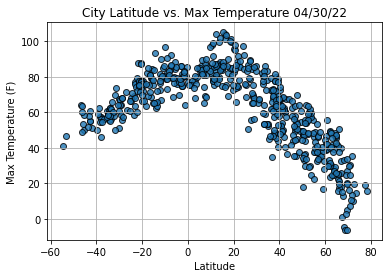

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Plot Latitude vs. Humidity

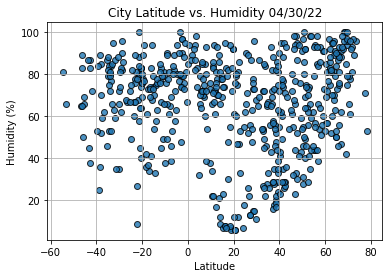

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs. Cloudiness

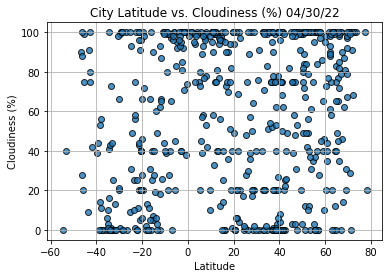

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs. Wind Speed

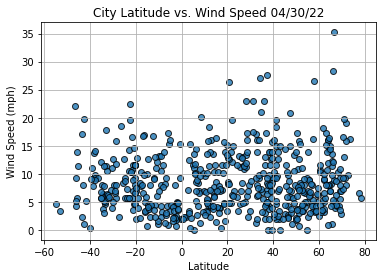

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()